In [5]:
%cd ../auto-cat-crop/

/Users/washizakikai/dev/k-washi/git/auto-cat-crop


In [88]:
%load_ext autoreload
%autoreload 2
from omegaconf import OmegaConf
import torchvision
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
%load_ext autoreload
%autoreload 2
from data.pet_dataloader import create_dataloader, IMG_MEAN, IMG_STD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 設定

In [90]:
conf_dict = {
    "img_dir": "./dataset/images",
    "train":{
        "val_rate": 0.2,
        "batch_size": 200,
        # 高速化のため
         "num_worker": 2,
        "pin_memory": True, # CPUのメモリ領域がページングされないようになり、高速化が期待できる
    },
    "model": {
        "input_size": 64,
    }
}

In [91]:
cnf = OmegaConf.create(conf_dict)

# データローダ作成

In [92]:
dataloaders, label_set = create_dataloader(cnf)

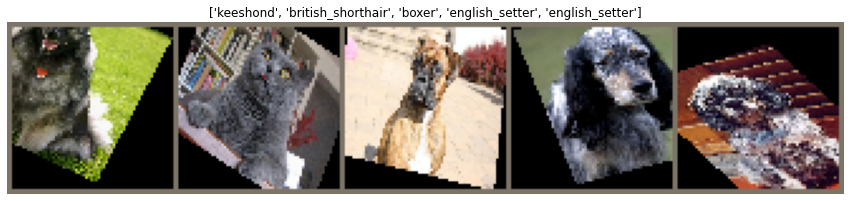

In [93]:
plot_N = 5
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(IMG_MEAN)
    std = np.array(IMG_STD)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)  # 最小値0, 最大値1でクリップ
    plt.figure(figsize=(15,5))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

inputs, labels = next(iter(dataloaders['train']))
inputs = inputs[:plot_N]
labels = labels[:plot_N]
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[label_set[x.cpu().item()] for x in labels])



[31, 22]
